In [ ]:
# Лабораторна робота №4_2
# ФБ-25 Голубєва Ірина

In [ ]:
import pandas as pd
import os
import urllib.request
import zipfile
import timeit
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def unzip_file(zip_path, extract_to_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        files_to_extract = [file for file in zip_ref.namelist() if not os.path.exists(os.path.join(extract_to_folder, file))]

        if files_to_extract:
            for file in files_to_extract:
                zip_ref.extract(file, extract_to_folder)
            print(f"Files extracted to {extract_to_folder}")
        else:
            print("No new files to extract.")

zip_file_path = '/Building_Permits.csv.zip'
destination_folder = '/lab4_2'

unzip_file(zip_file_path, destination_folder)

No new files to extract.


Pandas dataframe:


In [ ]:
df = pd.read_csv('/lab4_2/Building_Permits.csv')
df.head()

<ipython-input-3-44013b3a8edc>:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/lab4_2/Building_Permits.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [ ]:
df.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [ ]:
start_time = timeit.default_timer()

df.dropna(axis=1, how='all', inplace=True)

imputer_mean = SimpleImputer(strategy='mean')
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = imputer_mean.fit_transform(df[num_cols])

imputer_mode = SimpleImputer(strategy='most_frequent')
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = imputer_mode.fit_transform(df[cat_cols])


end_time = timeit.default_timer()
print(f"Час виконання для Pandas: {end_time - start_time} секунд")

print(df.isnull().sum())

Час виконання для Pandas: 2.669043743999964 секунд
Permit Number                                             0
Permit Type                                               0
Permit Type Definition                                    0
Permit Creation Date                                      0
Block                                                     0
                                                         ..
Neighborhoods - Analysis Boundaries_Treasure Island       0
Neighborhoods - Analysis Boundaries_Twin Peaks            0
Neighborhoods - Analysis Boundaries_Visitacion Valley     0
Neighborhoods - Analysis Boundaries_West of Twin Peaks    0
Neighborhoods - Analysis Boundaries_Western Addition      0
Length: 84, dtype: int64


In [ ]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4.0,sign - erect,05/06/2015,0326,023,140.0,A,Ellis,St,...,3.0,constr type 3,4.089529,wood frame (5),Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4.0,sign - erect,04/19/2016,0306,007,440.0,A,Geary,St,...,3.0,constr type 3,4.089529,wood frame (5),Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3.0,additions alterations or repairs,05/27/2016,0595,203,1647.0,A,Pacific,Av,...,1.0,constr type 1,1.000000,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8.0,otc alterations permit,11/07/2016,0156,011,1230.0,A,Pacific,Av,...,5.0,wood frame (5),5.000000,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6.0,demolitions,11/28/2016,0342,001,950.0,A,Market,St,...,3.0,constr type 3,4.089529,wood frame (5),Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


In [ ]:
start_time = timeit.default_timer()

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

df_norm = df.copy()

columns_to_normalize = ['Existing Construction Type', 'Proposed Construction Type', 'Supervisor District', 'Zipcode']

for column in columns_to_normalize:
    if column in df.columns:
        df_norm[column + '_normalized'] = normalize(df[column])

end_time = timeit.default_timer()
print(f"Час виконання для Pandas: {end_time - start_time} секунд")

df_norm[columns_to_normalize].head()

Час виконання для Pandas: 0.2478786259999879 секунд


,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
0,3.0,4.089529,3.0,94102.0
1,3.0,4.089529,3.0,94102.0
2,1.0,1.000000,3.0,94109.0
3,5.0,5.000000,3.0,94109.0
4,3.0,4.089529,6.0,94102.0


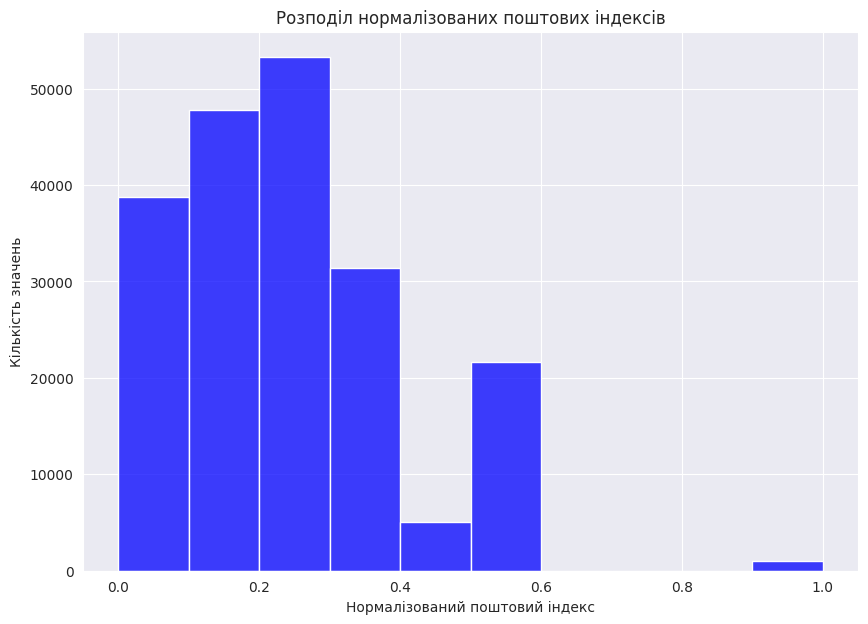

Час виконання для Pandas: 0.6262315540000145 секунд


In [ ]:
start_time = timeit.default_timer()

min_value = df_norm['Zipcode_normalized'].min()
max_value = df_norm['Zipcode_normalized'].max()

sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))

with sns.color_palette("Set2"):
    sns.histplot(df_norm['Zipcode_normalized'], bins=10, binrange=(min_value, max_value), color='blue')

    plt.xlabel('Нормалізований поштовий індекс')
    plt.ylabel('Кількість значень')
    plt.title('Розподіл нормалізованих поштових індексів')

plt.show()
end_time = timeit.default_timer()
print(f"Час виконання для Pandas: {end_time - start_time} секунд")

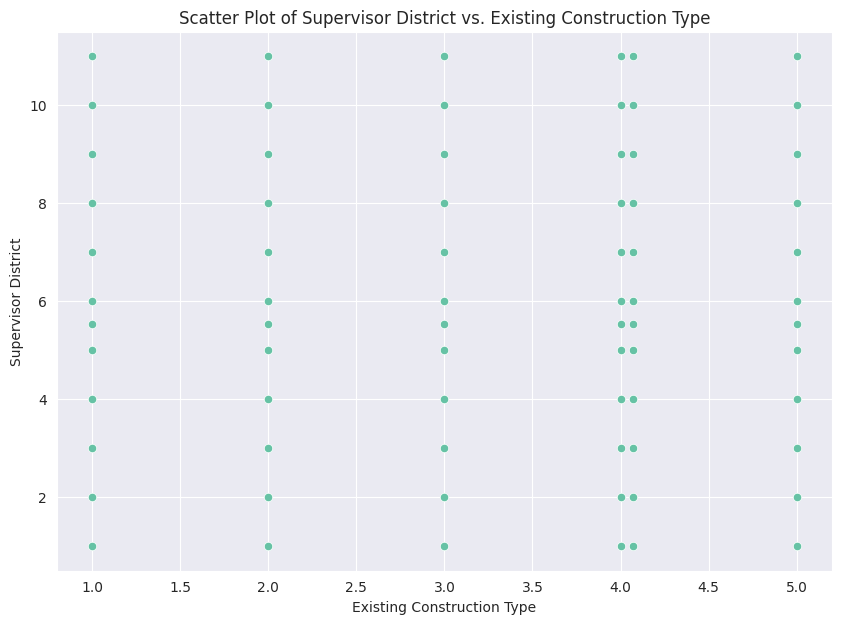

Час виконання для Pandas: 0.9278910870000345 секунд


In [ ]:
start_time = timeit.default_timer()
df['Existing Construction Type'] = df['Existing Construction Type'].astype(float)
df['Supervisor District'] = df['Supervisor District'].astype(float)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))

with sns.color_palette("Set2"):
    sns.scatterplot(data=df, x='Existing Construction Type', y='Supervisor District')

plt.xlabel('Existing Construction Type')
plt.ylabel('Supervisor District')
plt.title('Scatter Plot of Supervisor District vs. Existing Construction Type')

plt.show()
end_time = timeit.default_timer()
print(f"Час виконання для Pandas: {end_time - start_time} секунд")

In [ ]:
def pearson_corr(col1, col2):
    pearson_corr = df[col1].corr(df[col2], method='pearson')
    return pearson_corr

def spearman_corr(col1, col2):
    spearman_corr = df[col1].corr(df[col2], method='spearman')
    return spearman_corr

col1 = 'Existing Construction Type'
col2 = 'Proposed Construction Type'

start_time_pearson = timeit.default_timer()
pearson_coef = pearson_corr(col1, col2)
end_time_pearson = timeit.default_timer()
pearson_time = end_time_pearson - start_time_pearson

start_time_spearman = timeit.default_timer()
spearman_coef = spearman_corr(col1, col2)
end_time_spearman = timeit.default_timer()
spearman_time = end_time_spearman - start_time_spearman

print(f"Коефіцієнт кореляції Пірсона для '{col1}' та '{col2}': {pearson_coef}")
print(f"Час виконання для Пірсона: {pearson_time} секунд")
print(f"Коефіцієнт кореляції Спірмена для '{col1}' та '{col2}': {spearman_coef}")
print(f"Час виконання для Спірмена: {spearman_time} секунд")

Коефіцієнт кореляції Пірсона для 'Existing Construction Type' та 'Proposed Construction Type': 0.9638544347638605
Час виконання для Пірсона: 0.0069938359999923705 секунд
Коефіцієнт кореляції Спірмена для 'Existing Construction Type' та 'Proposed Construction Type': 0.9705828742201579
Час виконання для Спірмена: 0.03567410799996651 секунд


In [ ]:
def unique_values(column):
    unique_val = df[column].unique()
    num_unique_val = df[column].nunique()
    return unique_val, num_unique_val

neighborhood_unique, num_neighborhood_unique = unique_values('Neighborhoods - Analysis Boundaries')
print(f'Unique values: {neighborhood_unique}')
print(f'Number of unique values: {num_neighborhood_unique}')

def one_hot_encoding_fast(column):
    dummies = pd.get_dummies(df[column], prefix=column, dtype=int)
    return pd.concat([df, dummies], axis=1)

start_time = timeit.default_timer()
df = one_hot_encoding_fast('Neighborhoods - Analysis Boundaries')
execution_time_fast = timeit.default_timer() - start_time

print(f"Execution time for fast One Hot Encoding: {execution_time_fast} seconds")
df.head()


Unique values: ['Tenderloin' 'Russian Hill' 'Nob Hill' 'Potrero Hill' 'Inner Sunset'
 'Bayview Hunters Point' 'Lone Mountain/USF' 'Haight Ashbury'
 'Castro/Upper Market' 'Hayes Valley' 'Noe Valley' 'Pacific Heights'
 'Chinatown' 'Financial District/South Beach' 'Marina' 'Mission'
 'Sunset/Parkside' 'Outer Richmond' 'Western Addition' 'Bernal Heights'
 'Inner Richmond' 'Oceanview/Merced/Ingleside' 'Outer Mission' 'Portola'
 'Mission Bay' 'Visitacion Valley' 'Presidio Heights' 'West of Twin Peaks'
 'South of Market' 'Excelsior' 'North Beach' 'Glen Park' 'Treasure Island'
 'Twin Peaks' 'Lincoln Park' 'Japantown' 'Lakeshore' 'Seacliff'
 'Golden Gate Park' 'Presidio' 'McLaren Park']
Number of unique values: 41
Execution time for fast One Hot Encoding: 0.23036934500004236 seconds


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Neighborhoods - Analysis Boundaries_Russian Hill,Neighborhoods - Analysis Boundaries_Seacliff,Neighborhoods - Analysis Boundaries_South of Market,Neighborhoods - Analysis Boundaries_Sunset/Parkside,Neighborhoods - Analysis Boundaries_Tenderloin,Neighborhoods - Analysis Boundaries_Treasure Island,Neighborhoods - Analysis Boundaries_Twin Peaks,Neighborhoods - Analysis Boundaries_Visitacion Valley,Neighborhoods - Analysis Boundaries_West of Twin Peaks,Neighborhoods - Analysis Boundaries_Western Addition
0,201505065519,4.0,sign - erect,05/06/2015,0326,023,140.0,A,Ellis,St,...,0,0,0,0,1,0,0,0,0,0
1,201604195146,4.0,sign - erect,04/19/2016,0306,007,440.0,A,Geary,St,...,0,0,0,0,1,0,0,0,0,0
2,201605278609,3.0,additions alterations or repairs,05/27/2016,0595,203,1647.0,A,Pacific,Av,...,1,0,0,0,0,0,0,0,0,0
3,201611072166,8.0,otc alterations permit,11/07/2016,0156,011,1230.0,A,Pacific,Av,...,0,0,0,0,0,0,0,0,0,0
4,201611283529,6.0,demolitions,11/28/2016,0342,001,950.0,A,Market,St,...,0,0,0,0,1,0,0,0,0,0


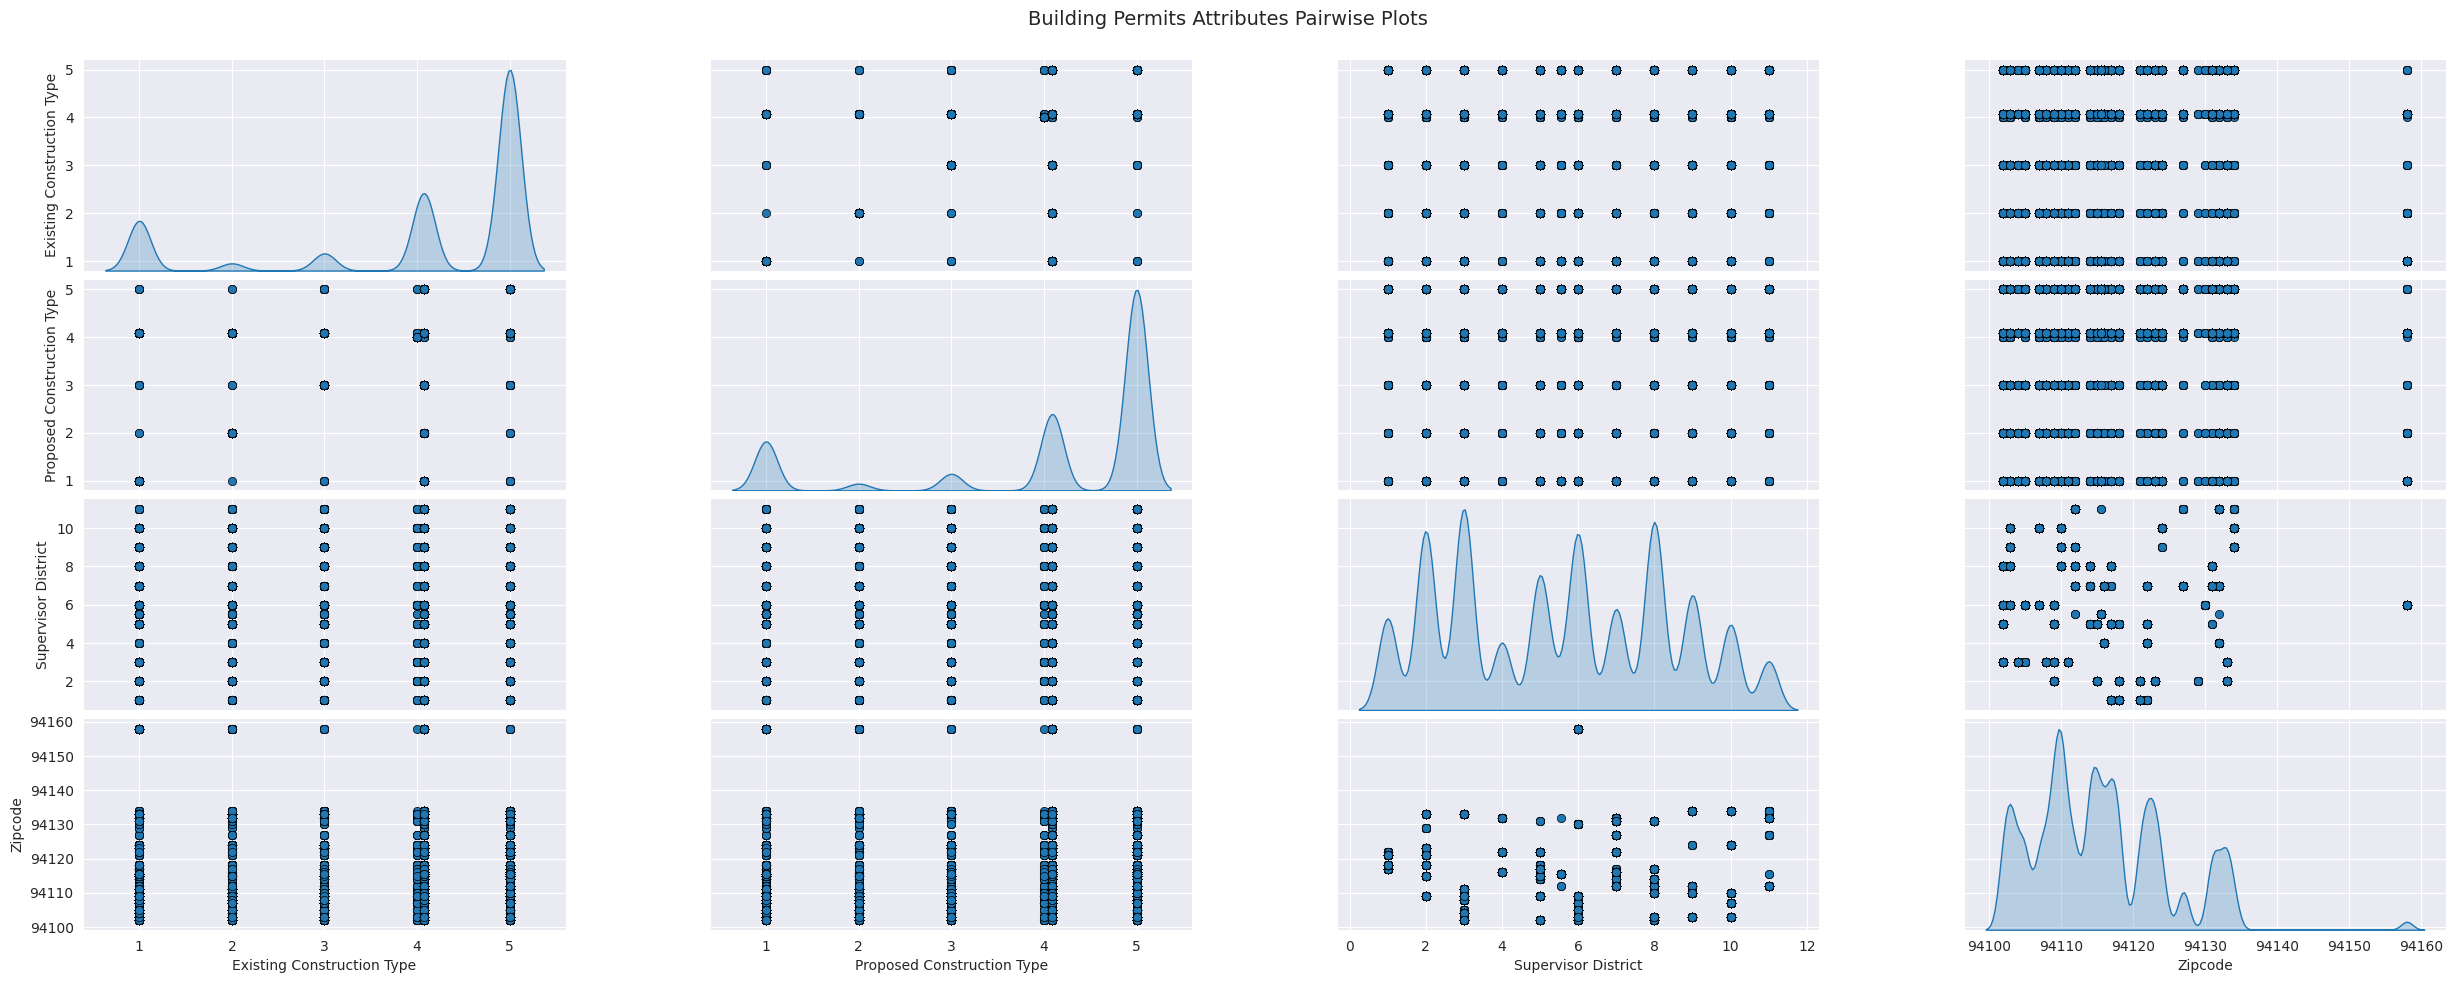

Час виконання для Pandas: 21.058791215999918 секунд


In [ ]:
start_time = timeit.default_timer()

cols = ['Existing Construction Type', 'Proposed Construction Type', 'Supervisor District', 'Zipcode']

pp = sns.pairplot(df[cols], height=2.5, aspect=2.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Building Permits Attributes Pairwise Plots', fontsize=14)

plt.show()
end_time = timeit.default_timer()
print(f"Час виконання для Pandas: {end_time - start_time} секунд")